In [12]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
path_to_umap_coords = "./../z2_combined_batch_corrected_data_mammary/umap_data_combined.txt"
df_umap = pd.read_csv(path_to_umap_coords,sep="\t",index_col=0)

In [3]:
path_to_metadata = "./../z2_combined_batch_corrected_data_mammary/meta_data_combined.txt"
df_metadata = pd.read_csv(path_to_metadata,sep="\t",index_col=0)
df_metadata["sample_id"] = [int(i[-1])-2 for i in df_metadata.index]

In [4]:
path_to_batch_corrected_data = "./../z2_combined_batch_corrected_data_mammary/top_2000_scaled_data_both_mammary.txt"
df_corrected_scores = pd.read_csv(path_to_batch_corrected_data,sep="\t",index_col=0).T

In [33]:
df_concat = pd.concat([df_corrected_scores,df_umap,df_metadata],axis=1)

In [111]:
df_concat_subset = df_concat[(df_concat["seurat_clusters"] == 2)|(df_concat["seurat_clusters"] == 4)|(df_concat["seurat_clusters"] == 11)|(df_concat["seurat_clusters"] == 13)]

In [112]:
df_concat_data = df_concat_subset[df_corrected_scores.columns]

In [113]:
x = StandardScaler().fit_transform(df_concat_data)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC-1', 'PC-2'])
principalDf.index = df_concat_data.index

In [114]:
df_concat_subset = pd.concat([df_concat_subset,principalDf],axis=1)

In [115]:
mammary_cluster = df_concat_subset[df_concat_subset["seurat_clusters"] == 13]

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


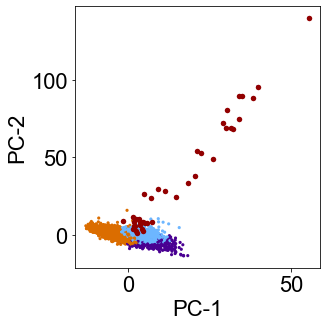

In [277]:
plt.rcParams["font.size"] = 22
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (5,5)
sns.scatterplot(df_concat_subset["PC-1"], df_concat_subset["PC-2"], linewidth = 0,s=10,hue=df_concat_subset["seurat_clusters"],palette=["#db6d00","#6db6ff","#490092","#490092"])
sns.scatterplot(mammary_cluster["PC-1"], mammary_cluster["PC-2"], linewidth = 0,s=30,color="#920000")
plt.legend('',frameon=False)
plt.tight_layout()
plt.savefig("PCA_plot_subsetted_clusters.png",dpi=1000)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


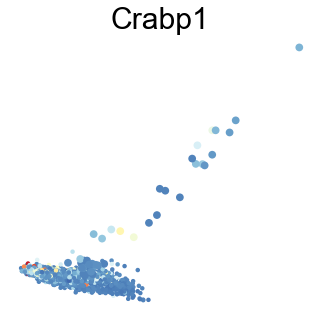

In [273]:
gene = "Crabp1"
plt.rcParams["font.size"] = 25
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (5,5)
sns.scatterplot(df_concat_subset["PC-1"], df_concat_subset["PC-2"], linewidth = 0,s=20,hue=df_concat_subset[gene],palette="RdYlBu_r")
sns.scatterplot(mammary_cluster["PC-1"], mammary_cluster["PC-2"], linewidth = 0,s=60,hue=df_concat_subset[gene],palette="RdYlBu_r")
plt.legend('',frameon=False)
plt.axis('off')
plt.title(gene)
plt.tight_layout()
plt.savefig("PCA_plot_subsetted_clusters_"+gene+".png",dpi=1000)

In [267]:
d_path = {}
path_to_signature = "./gene_signatures/curated_regulons_31340985_table_S3.gmt"
reference_genes = set(list(df_corrected_scores.columns))
with open(path_to_signature) as f:
    for line in f:
        a = line[:-1].split("\t")
        path_name = a[0]
        genes = a[2:]
        genes = [g.capitalize() for g in genes]
        genes = list(set(genes).intersection(reference_genes))
        if len(genes) > 5:
            d_path[path_name] = genes
        
d_path_scores = {}
for path in d_path:
    subset = df_concat_subset[d_path[path]]
    subset = subset.apply(zscore)
    scores = subset.mean(axis=1)
    d_path_scores[path] = scores

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


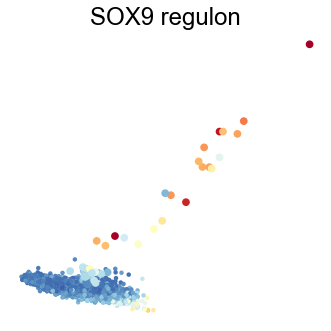

In [269]:
gene = "reg_SOX9"
color_by = d_path_scores[gene]
plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (5,5)
sns.scatterplot(df_concat_subset["PC-1"], df_concat_subset["PC-2"], linewidth = 0,s=20,hue=color_by,palette="RdYlBu_r")
sns.scatterplot(mammary_cluster["PC-1"], mammary_cluster["PC-2"], linewidth = 0,s=60,hue=color_by,palette="RdYlBu_r")
plt.legend('',frameon=False)
plt.axis('off')
plt.title("SOX9 regulon")
plt.tight_layout()
plt.savefig("PCA_plot_subsetted_clusters_"+gene+".png",dpi=1000)

In [ ]:
sns.scatterplot(mammary_cluster["Krt8"], mammary_cluster["Krt18"], linewidth = 0,s=25,hue=df_concat_subset["seurat_clusters"],palette="Spectral")
